In [834]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px
import re

# Function to extract numbers from a string
def extract_number(s):
    return re.search(r'\d+', s).group()

# Since all columns do not show up
pd.set_option('display.max_columns', None)

In [835]:
# Reading the data
loans = pd.read_csv('./loan.csv', low_memory=False)

In [836]:
# Check the shape
loans.shape

(39717, 111)

In [837]:
# Drop all the null empty  col
loans = loans.dropna(axis=1, how="all")
loans.shape

(39717, 57)

In [838]:
# There are columns with null values lets clean them up
loans = loans.dropna(axis=1, how="all")
loans.shape

(39717, 57)

In [839]:
# Remove columns with constant value for all elements
cols = loans.nunique()[loans.nunique() == 1].index
print(cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [840]:
loans = loans.drop(cols, axis=1)
loans.shape

(39717, 48)

In [841]:
# Remove columns with 100% random value for all elements
cols = loans.nunique()[loans.nunique() == loans.shape[0]].index
print(cols)

Index(['id', 'member_id', 'url'], dtype='object')


In [842]:
loans = loans.drop(cols, axis=1)
loans.shape

(39717, 45)

In [843]:
# Find NaN entries
nan_cols = loans.isna().sum()
nan_cols = nan_cols[nan_cols != 0]
print(nan_cols.sort_values(ascending=False))

next_pymnt_d              38577
mths_since_last_record    36931
mths_since_last_delinq    25682
desc                      12942
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
dtype: int64


In [844]:
# Delete  cols with too many nan and also if they are not relavent
cols = ['next_pymnt_d', 'mths_since_last_record', 'desc', 'emp_title', 'emp_length', 'last_pymnt_d']
loans = loans.drop(cols, axis=1)
loans.shape

(39717, 39)

In [845]:
# Fill remaining NaN with 0
#loans = loans.fillna(0)

In [846]:
loans['loan_status'].value_counts().sort_index()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: count, dtype: int64

In [847]:
# As we need to analyze the risk, we do not need data from
# loan_status == current so remove it.
loans = loans[loans['loan_status'] != 'Current']
loans['loan_status'].value_counts().sort_index()

loan_status
Charged Off     5627
Fully Paid     32950
Name: count, dtype: int64

In [848]:
loans.shape

(38577, 39)

In [849]:
column_distribution = loans.describe(include='all')
column_distribution = column_distribution.round()
print(column_distribution)

        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
count     38577.0      38577.0          38577.0       38577    38577   
unique        NaN          NaN              NaN           2      370   
top           NaN          NaN              NaN   36 months   10.99%   
freq          NaN          NaN              NaN       29096      913   
mean      11047.0      10784.0          10222.0         NaN      NaN   
std        7348.0       7090.0           7023.0         NaN      NaN   
min         500.0        500.0              0.0         NaN      NaN   
25%        5300.0       5200.0           5000.0         NaN      NaN   
50%        9600.0       9550.0           8733.0         NaN      NaN   
75%       15000.0      15000.0          14000.0         NaN      NaN   
max       35000.0      35000.0          35000.0         NaN      NaN   

        installment  grade sub_grade home_ownership  annual_inc  \
count       38577.0  38577     38577          38577     38577.0   
u

In [850]:
# Delete cols which does not show meaningful number in the distribution
cols = ['term', 'issue_d', 'title', 'zip_code', 'addr_state', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
        'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'pub_rec_bankruptcies']
loans = loans.drop(cols, axis=1)
loans.shape

(38577, 17)

In [851]:
print(loans.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'last_credit_pull_d'],
      dtype='object')


In [852]:
# Select loan_status == "Charged Off" find the column distribution
charged_off_loans = loans[loans['loan_status'] == 'Charged Off']
charged_off_loans['loan_status'].value_counts().sort_index()

loan_status
Charged Off    5627
Name: count, dtype: int64

In [853]:
# Select loan_status == "Fully Paid" find the column distribution
fully_paid_loans = loans[loans['loan_status'] == 'Fully Paid']
fully_paid_loans['loan_status'].value_counts().sort_index()

loan_status
Fully Paid    32950
Name: count, dtype: int64

In [854]:
# Recheck the DF Frame
loans.shape

(38577, 17)

In [855]:
# Check what columns are left and go to the sheet for their definition
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'last_credit_pull_d'],
      dtype='object')

In [856]:
#sneak the data post cleanup
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv int_rate  installment grade  \
0       5000         5000           4975.0   10.65%       162.87     B   
1       2500         2500           2500.0   15.27%        59.83     C   
2       2400         2400           2400.0   15.96%        84.33     C   
3      10000        10000          10000.0   13.49%       339.31     C   
5       5000         5000           5000.0    7.90%       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0        B2           RENT     24000.0            Verified   Fully Paid   
1        C4           RENT     30000.0     Source Verified  Charged Off   
2        C5           RENT     12252.0        Not Verified   Fully Paid   
3        C1           RENT     49200.0     Source Verified   Fully Paid   
5        A4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  
0     credit_card  27.65         3        0     83.70%             May-16  
1             car   1.00         3        0      9.40%             Sep-13  
2  small_business   8.72         2        0     98.50%             May-16  
3           other  20.00        10        0        21%             Apr-16  
5         wedding  11.20         9        0     28.30%             Jan-16

In [857]:
# We have the data types here
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  loan_status          38577 non-null  object 
 11  purpose              38577 non-null  object 
 12  dti                  38577 non-null  float64
 13  open_acc             38577 non-null  int64  
 14  pub_rec              38577 non-null  int64  
 15  revol_util           38527 non-null  obje

In [858]:
#Standardising the data now


In [859]:
#Remove percentages
loans.int_rate = pd.to_numeric(loans.int_rate.apply(lambda x : x.split('%')[0]))


In [860]:
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
5       5000         5000           5000.0      7.90       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0        B2           RENT     24000.0            Verified   Fully Paid   
1        C4           RENT     30000.0     Source Verified  Charged Off   
2        C5           RENT     12252.0        Not Verified   Fully Paid   
3        C1           RENT     49200.0     Source Verified   Fully Paid   
5        A4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  
0     credit_card  27.65         3        0     83.70%             May-16  
1             car   1.00         3        0      9.40%             Sep-13  
2  small_business   8.72         2        0     98.50%             May-16  
3           other  20.00        10        0        21%             Apr-16  
5         wedding  11.20         9        0     28.30%             Jan-16

<Axes: >

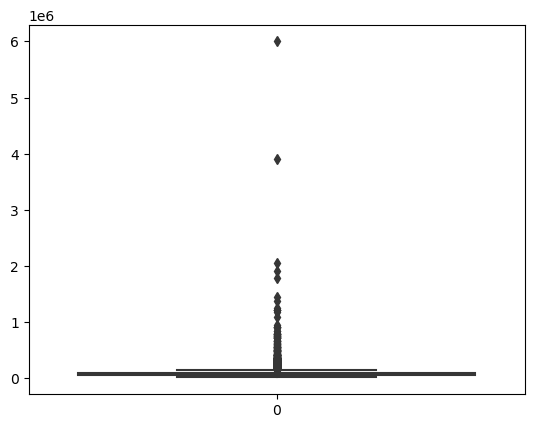

In [861]:
## During analysis finding out those records that are way too high or too low are called outliners lets use box plot
#Outliers
sea.boxplot(loans["annual_inc"])

In [862]:
# Clearly indicating the presence of outliers.
# So, Removing them. The values after 98 percentile seems to be disconected from the general
# distribution and also there is huge increase in the value for small quantile variation.
# So, considering threshold for removing outliers as 0.95
quantile_info = loans.annual_inc.quantile([0.5, 0.75,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.91    120000.0
0.92    122000.0
0.93    127500.0
0.94    134000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [863]:
fig = px.histogram(loans, x="annual_inc")
fig.show()

In [864]:
px.box(loans,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()


In [865]:
## Removing outliers in annual_inc greater than 98th percentile
loans = loans[loans.annual_inc<=np.percentile(loans.annual_inc,98)]
per_98_annual_inc = loans['annual_inc'].quantile(0.98)
loans = loans[loans.annual_inc <= per_98_annual_inc]
loans.shape

(37091, 17)

<Axes: >

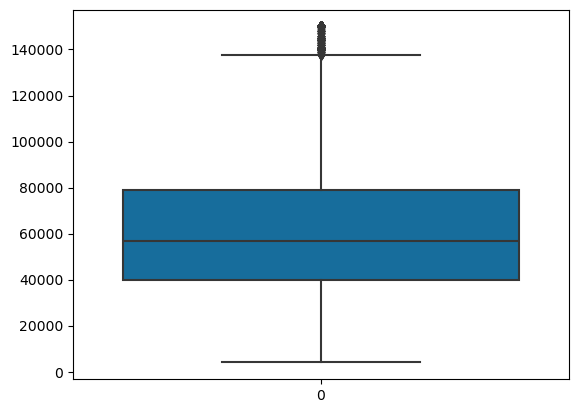

In [866]:
# Balanced data for annual inc in boxplot
sea.boxplot(loans.annual_inc)


In [867]:
px.box(loans, x='annual_inc', width=750, height=350, title='Annual Income of the Borrower',
       labels={'annual_inc':'Annual Income'}).show()


In [868]:
# Check DTI
px.box(loans,x='dti',width=750,height=350,title='DTI',labels={'dti':'DTI'}).show()


<Axes: >

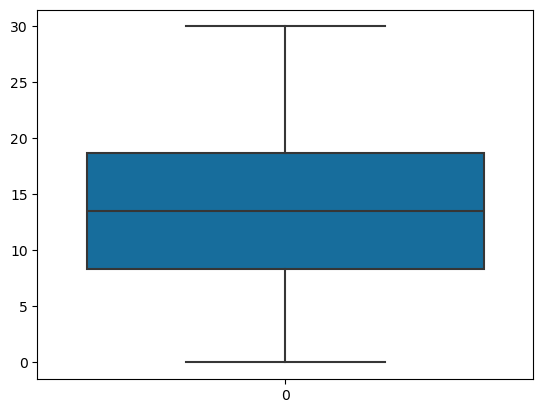

In [869]:
# Next numeric field is dti looks balanced nothing to change
sea.boxplot(loans.dti)


In [870]:
# Check box for Loan Amount
px.box(loans, x='loan_amnt', width=750,height=350, title='Loan Amount',
       labels={'annual_inc':'Loan Amount'}).show()


<Axes: >

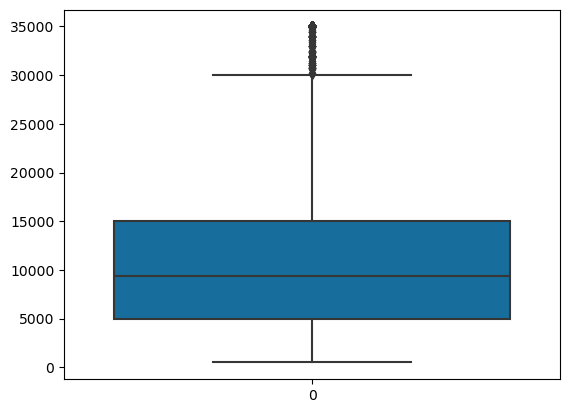

In [871]:
# Check box plot loan amount
sea.boxplot(loans.loan_amnt)


In [872]:
# Check loan amount quantile
loans.loan_amnt.quantile([0.75,0.90,0.95,0.96,0.97,0.975,0.98,0.985,0.99,0.995, 1.0])


0.750    15000.0
0.900    20000.0
0.950    25000.0
0.960    25000.0
0.970    26000.0
0.975    28000.0
0.980    30000.0
0.985    31000.0
0.990    35000.0
0.995    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [873]:
#Plot funded amount inventory
px.box(loans, x='funded_amnt_inv', width=750, height=350, title='Funded Amount Inv',
       labels={'funded_amnt_inv':'Funded Amount Inv'}).show()


<Axes: >

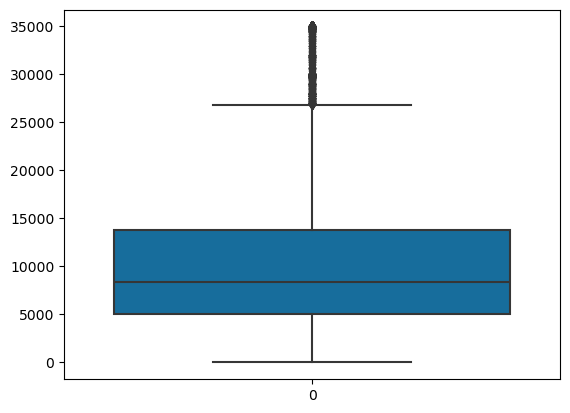

In [874]:
##Boxplot funded amount inventory
sea.boxplot(loans.funded_amnt_inv)


In [875]:
## Steady increase nothing to clean up
loans.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99,0.995, 1.0])


0.500     8400.00000
0.750    13750.00000
0.900    19828.35096
0.950    23975.00000
0.970    25000.00000
0.975    25950.00000
0.980    28000.00000
0.985    29975.00000
0.990    32327.50000
0.995    34950.00000
1.000    35000.00000
Name: funded_amnt_inv, dtype: float64

In [876]:
# Will not be removing funded amount inv nor the loan amount both are continuous 

In [877]:
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
5       5000         5000           5000.0      7.90       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0        B2           RENT     24000.0            Verified   Fully Paid   
1        C4           RENT     30000.0     Source Verified  Charged Off   
2        C5           RENT     12252.0        Not Verified   Fully Paid   
3        C1           RENT     49200.0     Source Verified   Fully Paid   
5        A4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  
0     credit_card  27.65         3        0     83.70%             May-16  
1             car   1.00         3        0      9.40%             Sep-13  
2  small_business   8.72         2        0     98.50%             May-16  
3           other  20.00        10        0        21%             Apr-16  
5         wedding  11.20         9        0     28.30%             Jan-16

<Axes: xlabel='loan_status', ylabel='count'>

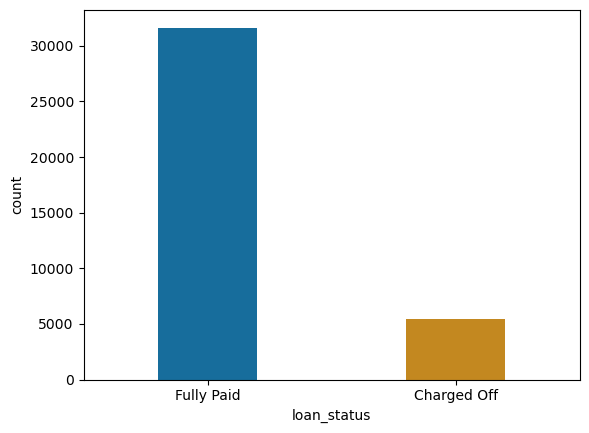

In [878]:
## Vizualize data by category only

sea.countplot(x = 'loan_status', data=loans, width=0.4)

In [879]:
print(loans.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'last_credit_pull_d'],
      dtype='object')


In [880]:
# Remove alphabets and apply only numerics
loans.sub_grade = pd.to_numeric(loans.sub_grade.apply(lambda x : x[-1]))
loans.sub_grade.unique()

array([2, 4, 5, 1, 3])

In [881]:
loans.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [882]:
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

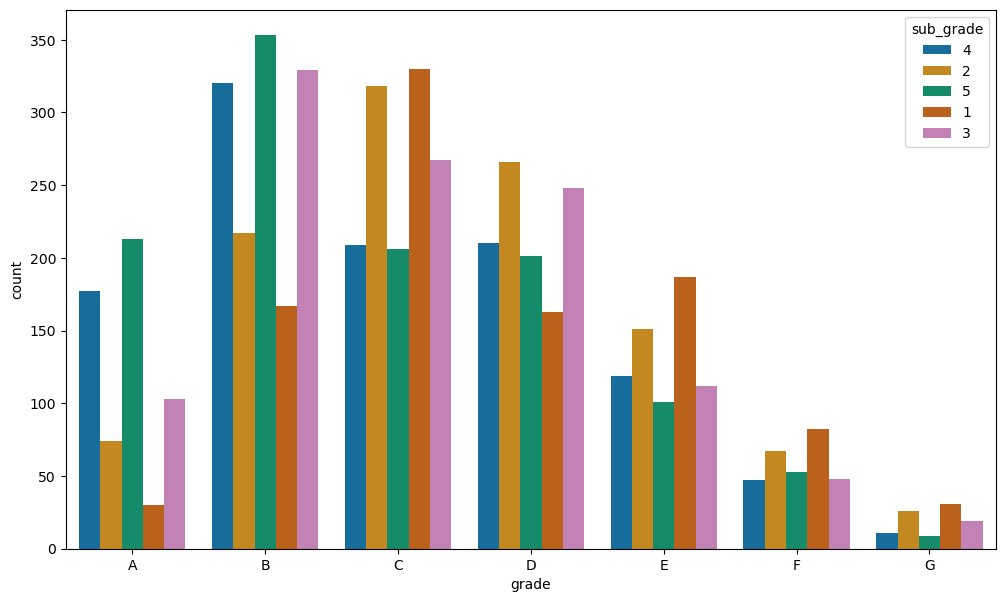

In [883]:
loans.sub_grade = loans.sub_grade.astype('str')
fig, ax = plt.subplots(figsize=(12,7))
sea.countplot(x = 'grade', data = loans[loans.loan_status == 'Charged Off'],
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue = 'sub_grade')

<Axes: xlabel='grade', ylabel='count'>

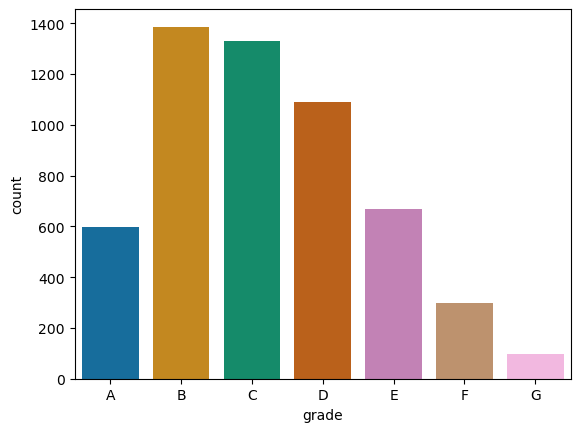

In [884]:
sea.countplot(x = 'grade', data = loans[loans.loan_status == 'Charged Off'],
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [885]:
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
5       5000         5000           5000.0      7.90       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0         2           RENT     24000.0            Verified   Fully Paid   
1         4           RENT     30000.0     Source Verified  Charged Off   
2         5           RENT     12252.0        Not Verified   Fully Paid   
3         1           RENT     49200.0     Source Verified   Fully Paid   
5         4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  
0     credit_card  27.65         3        0     83.70%             May-16  
1             car   1.00         3        0      9.40%             Sep-13  
2  small_business   8.72         2        0     98.50%             May-16  
3           other  20.00        10        0        21%             Apr-16  
5         wedding  11.20         9        0     28.30%             Jan-16

In [886]:
#checking unique values for home_ownership
loans['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [887]:
loan.home_ownership.value_counts()

home_ownership
MORTGAGE    63
RENT        50
OWN          7
Name: count, dtype: int64

In [888]:
#can replace NONE with OTHER
loans['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [889]:
#checking unique values for home_ownership again
loans['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

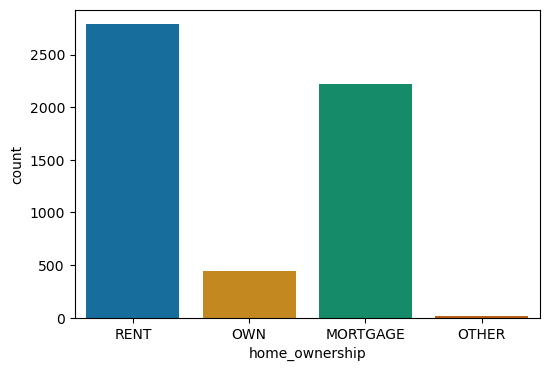

In [890]:
#Analysing Home Ownership
fig, ax = plt.subplots(figsize = (6,4))
sea.countplot(x='home_ownership', data=loans[loans['loan_status']=='Charged Off'])


#Applicants staying on Rent have not paid the instalments in due time for a long period of time, 
#i.e. he/she has defaulted on the loan 

<Axes: xlabel='count', ylabel='purpose'>

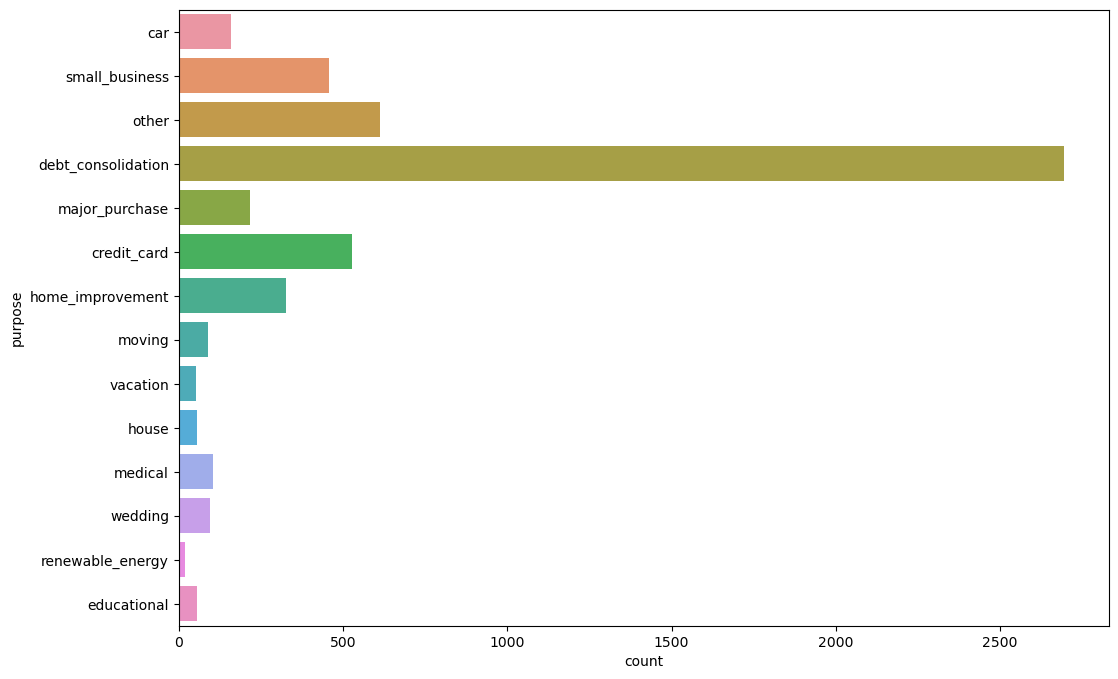

In [891]:
# Analysing Purpose why does one need the loan
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sea.countplot(y ='purpose', data=loans[loans.loan_status == 'Charged Off'])

## Analysis purpose is a category provided by the borrower for the loan request. Appears that who ever took the 
## loan for debt_consolidation did not pay back and has defalted 



In [892]:
# Create a group of the interest rates we have divided them into 8 bins
# the above calc was to check min, max and median
loans['int_rate_groups'] = pd.cut(loans['int_rate'], bins=7,precision =0,
                                  labels=['5%-8%','8%-10%','10%-12%','12%-14%','14%-16%','16%-20%','20%-24%'])


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='count', ylabel='int_rate_groups'>

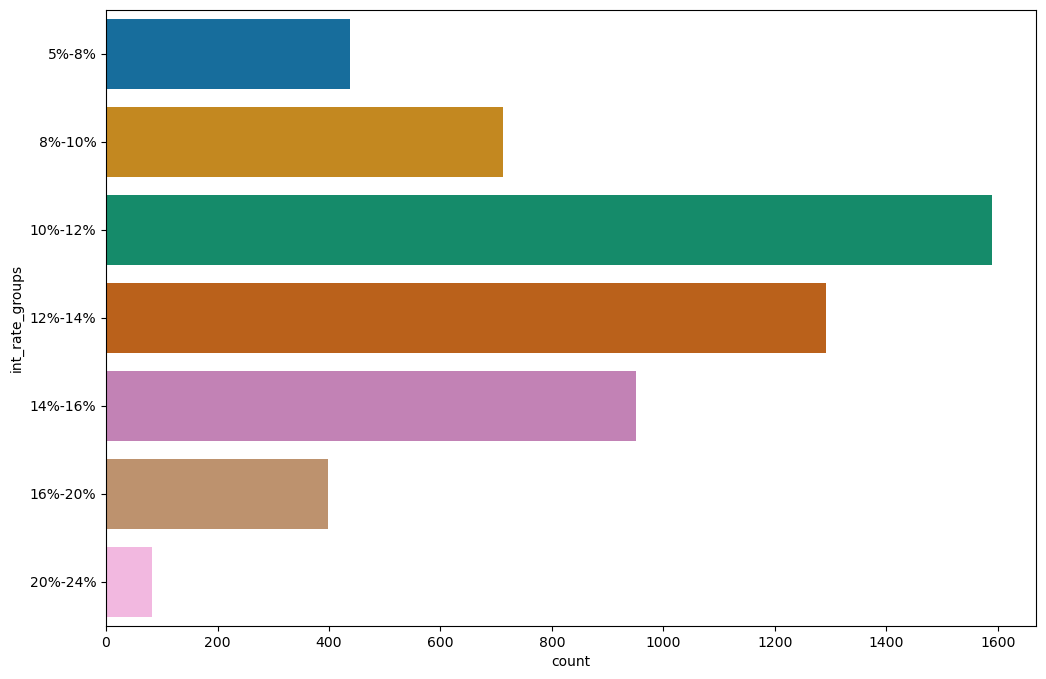

In [893]:
# Analysing int_rate on loan
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sea.countplot(y ='int_rate_groups', data=loans[loans.loan_status == 'Charged Off'])

## Analysis int_rate Interest Rate on the loan. Appears that maximum number 
## who took the loan at interest rates 8.94% and 11.83% defaulted


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='count', ylabel='open_acc_groups'>

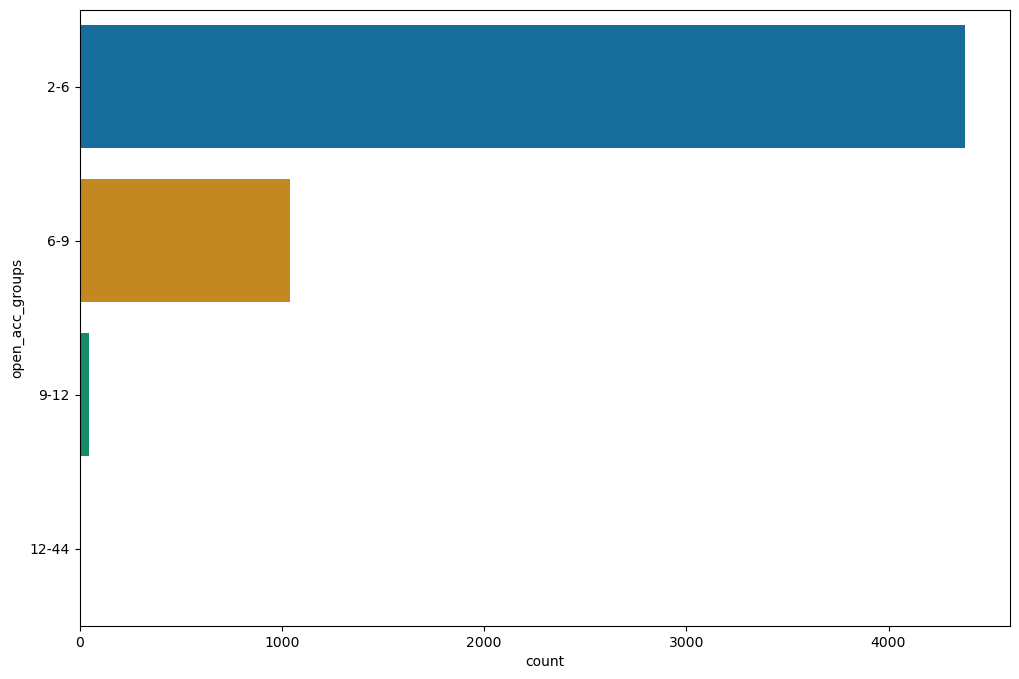

In [894]:
# Analysis to get the Group by open_acc -> The number of open credit lines in the borrower's credit file.
loans['open_acc_groups'] = pd.cut(loans['open_acc'],bins = 4,precision =0,labels=['2-6','6-9','9-12','12-44'])
fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='open_acc_groups', data=loans[loans.loan_status == 'Charged Off'])

## Analysis open_acc . Maximum number are part of the 2-6% credit line group

In [895]:
loans.loc[:,['open_acc', 'open_acc_groups']]

open_acc open_acc_groups
0             3             2-6
1             3             2-6
2             2             2-6
3            10             2-6
5             9             2-6
...         ...             ...
39711        10             2-6
39712        13             6-9
39713         6             2-6
39714        11             2-6
39716         7             2-6

[37091 rows x 2 columns]

In [896]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_util', 'last_credit_pull_d', 'int_rate_groups',
       'open_acc_groups'],
      dtype='object')

In [897]:
loans.revol_util.describe()

count     37042
unique     1083
top          0%
freq        899
Name: revol_util, dtype: object

In [898]:
# Maximum grouping that have defaulted are in range 49.2 & 72.2

In [899]:
#The self-reported annual income provided by the borrower during registration.
loans['annual_inc'].describe()

count     37091.000000
mean      61875.090474
std       29125.064445
min        4000.000000
25%       40000.000000
50%       56650.000000
75%       79000.000000
max      150000.000000
Name: annual_inc, dtype: float64

In [900]:
loans['annual_inc_groups'] = pd.cut(loans['annual_inc'], bins=4,precision =0,labels =['4k-40k','40k-57k','57k-79200','79200-150k'])


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='count', ylabel='annual_inc_groups'>

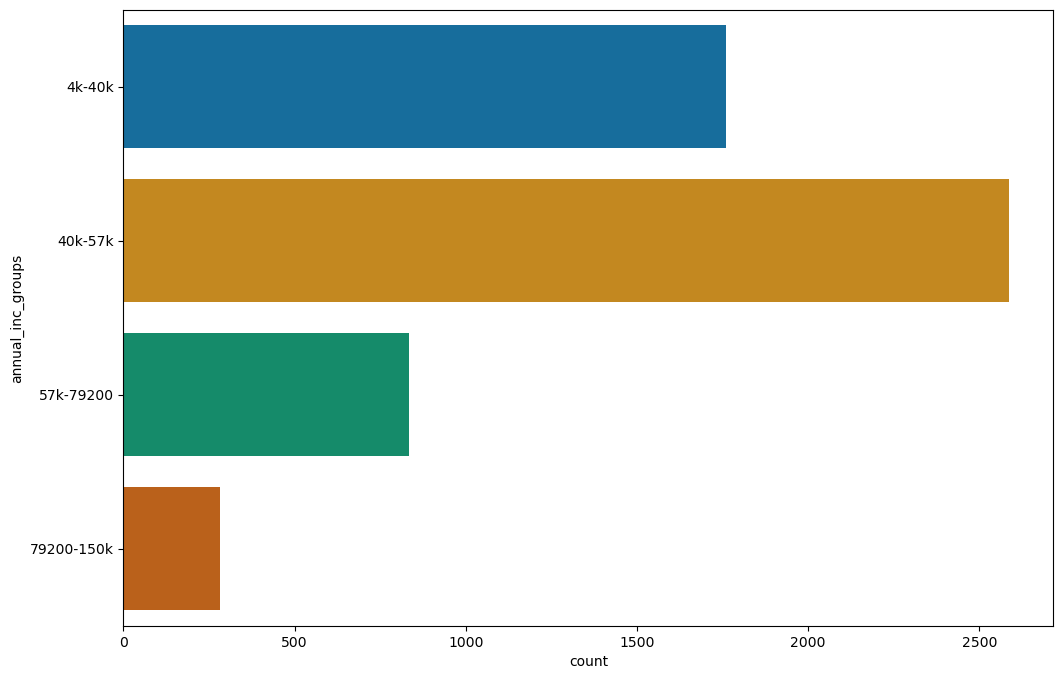

In [901]:
# Analysis to get the Group by Annual Income -> 
## The total income reported by the user

fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='annual_inc_groups', data=loans[loans.loan_status == 'Charged Off'])

In [902]:
# The people who have declared annual salaries in group 40K to 57K are high defaulters

In [903]:
#View Bins

loans.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
5       5000         5000           5000.0      7.90       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0         2           RENT     24000.0            Verified   Fully Paid   
1         4           RENT     30000.0     Source Verified  Charged Off   
2         5           RENT     12252.0        Not Verified   Fully Paid   
3         1           RENT     49200.0     Source Verified   Fully Paid   
5         4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  \
0     credit_card  27.65         3        0     83.70%             May-16   
1             car   1.00         3        0      9.40%             Sep-13   
2  small_business   8.72         2        0     98.50%             May-16   
3           other  20.00        10        0        21%             Apr-16   
5         wedding  11.20         9        0     28.30%             Jan-16   

  int_rate_groups open_acc_groups annual_inc_groups  
0          8%-10%             2-6            4k-40k  
1         12%-14%             2-6            4k-40k  
2         12%-14%             2-6            4k-40k  
3         10%-12%             2-6           40k-57k  
5           5%-8%             2-6            4k-40k

<Axes: xlabel='pub_rec', ylabel='count'>

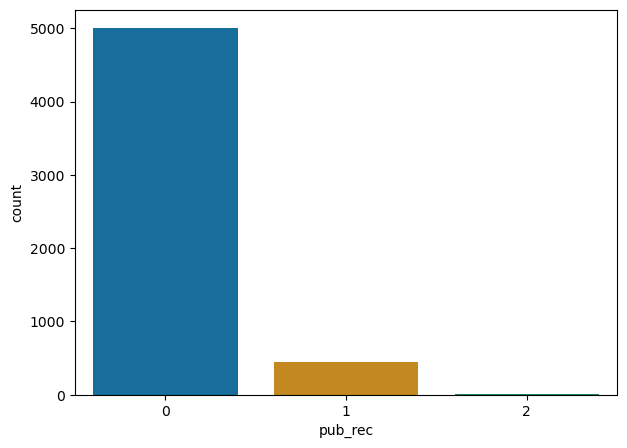

In [904]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='pub_rec', data=loans[loans['loan_status']=='Charged Off'])

In [905]:
# Number of derogatory public records is zero the defaults are high

In [906]:
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
5       5000         5000           5000.0      7.90       156.46     A   

  sub_grade home_ownership  annual_inc verification_status  loan_status  \
0         2           RENT     24000.0            Verified   Fully Paid   
1         4           RENT     30000.0     Source Verified  Charged Off   
2         5           RENT     12252.0        Not Verified   Fully Paid   
3         1           RENT     49200.0     Source Verified   Fully Paid   
5         4           RENT     36000.0     Source Verified   Fully Paid   

          purpose    dti  open_acc  pub_rec revol_util last_credit_pull_d  \
0     credit_card  27.65         3        0     83.70%             May-16   
1             car   1.00         3        0      9.40%             Sep-13   
2  small_business   8.72         2        0     98.50%             May-16   
3           other  20.00        10        0        21%             Apr-16   
5         wedding  11.20         9        0     28.30%             Jan-16   

  int_rate_groups open_acc_groups annual_inc_groups  
0          8%-10%             2-6            4k-40k  
1         12%-14%             2-6            4k-40k  
2         12%-14%             2-6            4k-40k  
3         10%-12%             2-6           40k-57k  
5           5%-8%             2-6            4k-40k

In [907]:
## DTI - > A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
## excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [908]:
loans.dti.describe()

count    37091.000000
mean        13.413590
std          6.662373
min          0.000000
25%          8.300000
50%         13.530000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='dti_groups', ylabel='count'>

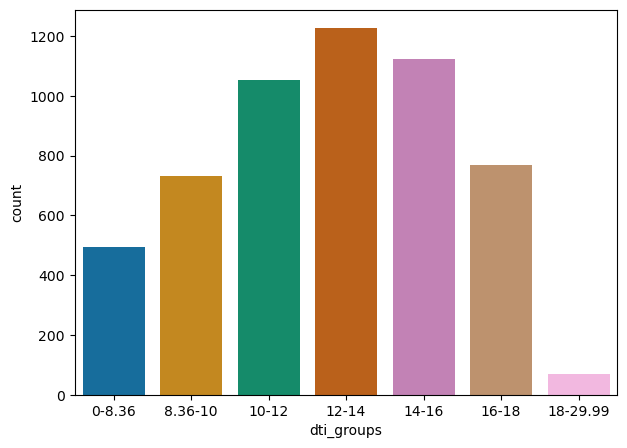

In [909]:
loans['dti_groups'] = pd.cut(loans['dti'], bins = 7, precision = 0,
                             labels = ['0-8.36','8.36-10','10-12','12-14','14-16','16-18','18-29.99'])
fig, ax = plt.subplots(figsize = (7, 5))
sea.countplot(x='dti_groups', data=loans[loans['loan_status']=='Charged Off'])

In [910]:
loans.dti_groups.describe()

count     37091
unique        7
top       12-14
freq       7996
Name: dti_groups, dtype: object

In [911]:
##Observations

#There is a more probability of defaulting when :
#Applicants house_ownership as 'RENT'
#Applicants who use the loan to clear other debts
#Applicants who receive interest at the rate of 10-16%
#Applicants who have an income of range 31201 - 58402
#Applicants who have 2-6 open_acc
#Applicants who have revolving line between 49 and 99
#Applicants with employment length of 10
#Term of 36 months
#When the loan status is Not verified
#The total number of credit lines currently in the borrower's credit file is between 2-13
#The people who have declared annual salaries in group 40K to 57K 
#When the no of enquiries in last 6 months is 0
#When the number of derogatory public records is 0
#When the purpose is 'debt_consolidation'
#DTI is 10-16
#Loan amount is 500 to 5200
#funded amount is around the 5K range
# Observation on dates in the year 2011 particularly in December month there are high defaults
#Observations
#The chance of defaulting goes up when :
#Applicants taking loan for 'home improvement' and have income of 60k -70k
#Applicants with ownership is 'MORTGAGE and have income of ~65-70k
#Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
#Applicants who have salaries less than 50K and lower interest rates (5-8%) have also defaulted
#Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
#When employment length is 10yrs and loan amount is 12k-14k
#When the loan is verified and loan amount is above 16k

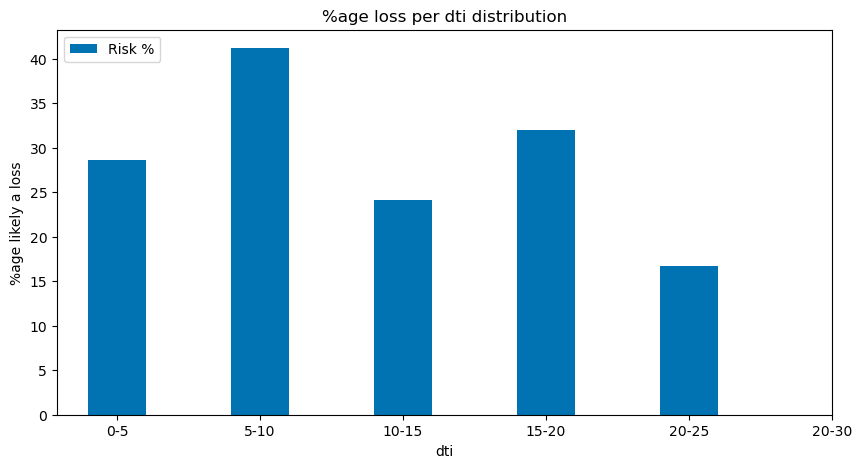

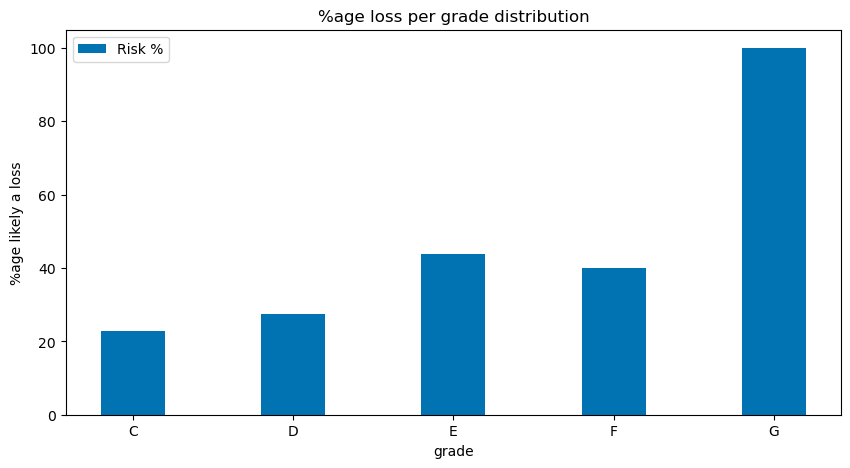

In [912]:

# The Grade and DTI columns look more interesting. Let's do a deep dive.
# Create the percentage of loss-making disbursements against the total disbursements.

# Define bins edges, and labels
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '20-30']

# Cleanup elements
def clean_data(loan):
    loan = loan.copy()
    # Drop the rows where all elements are missing
    loan.dropna(how='all', axis=0, inplace=True)
    # Drop the columns where all elements are missing
    loan.dropna(how='all', axis=1, inplace=True)
    # remove non integer chars
    loan = loan.dropna(subset=['emp_length'])
    loan['emp_length'] = loan['emp_length'].apply(lambda x: re.sub(r'\W+', '', str(x)))
    return loan

# Filter the records to find most risky loan
def filter_data(loan):
    # Consider grade above A and B loans.
    loan = loan[loan['grade'] != 'A']
    loan = loan[loan['grade'] != 'B']

    # And there is at least one bankruptcy.
    loan = loan[~loan['pub_rec_bankruptcies'].isin([0, 'NA'])]

    # Also, at a higher range of debt to inome ratio.
    # Put dti into the range buckets of [0-5] and so on.
    loan = loan[loan['dti'] != 0]
    loan = loan.dropna(subset=['dti'])
    loan.loc[:, 'dti'] = pd.cut(loan['dti'], bins, labels=labels)

    # There has been enquiry in the last 6 months.
    loan = loan[loan['inq_last_6mths'] != 0]
    loan = loan.dropna(subset=['inq_last_6mths'])

    # And there is trouble in repayments for past two years.
    loan = loan[loan['delinq_2yrs'] != 0]
    loan = loan.dropna(subset=['delinq_2yrs'])

    # Only consider loans which are already fully paid or charged off
    loan = loan[loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]

    return loan

def risk_pc_bar_chart(col):
    # Has the list of all loans
    loan_counts = loan[col].value_counts().sort_index()
    
    # Get the list of only loss making loans
    loss_counts = loss[col].value_counts().sort_index()
    loss_counts = loss_counts.reindex(loan_counts.index, fill_value=0)
    r = np.arange(len(loss_counts.index))

    # For the given column calculate the percentage of chances of a loss/risk
    loss_percentages = (loss_counts / loan_counts) * 100

    # Plot the bar chart. x-axis: value_counts, y-axis: percent of chances of a loss/risk
    plt.figure(figsize=(10, 5))
    plt.bar(r, loss_percentages.values, label='Risk %', width=0.4)
    
    plt.xticks(r, loss_counts.index)
    plt.xlabel(col)
    plt.ylabel('%age likely a loss')
    plt.title(f'%age loss per {col} distribution')
    plt.legend()
    plt.show()

###########################

loan = pd.read_csv('./loan.csv', low_memory=False)
loan = clean_data(loan)
loan = filter_data(loan)

loss = loan[loan['loan_status'] == 'Charged Off']
#unused
#profit = loan[loan['loan_status'] == 'Fully Paid']

#suitable_cols = ['dti', 'grade', 'delinq_2yrs']
suitable_cols = ['dti', 'grade']

for col in suitable_cols:
    # Plot bar char for %age risk at the given column
    risk_pc_bar_chart(col)
